In [59]:
import pandas as pd
import matplotlib.pyplot as plt


In [152]:
df = pd.read_csv('/content/super_store_Data.csv',encoding='latin-1')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [153]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [154]:
df.rename(columns ={"Order ID":"Order_ID",'Order Date':'order_date'},inplace = True)
df.columns

Index(['Row ID', 'Order_ID', 'order_date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [155]:
df.isnull().sum()

Row ID           0
Order_ID         0
order_date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [156]:
df['order_date'] = pd.to_datetime(df['order_date'],dayfirst = True , yearfirst= False)
df['order_date']

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: order_date, Length: 9994, dtype: datetime64[ns]

In [157]:
df.columns

Index(['Row ID', 'Order_ID', 'order_date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# **Total sales amount for each month**

In [143]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df.head()
res  = df.groupby(['year','month']).agg({'Sales':'sum'}).reset_index()
res

,year,month,Sales
0,2014,1,14236.8950
1,2014,2,4519.8920
2,2014,3,55691.0090
3,2014,4,28295.3450
4,2014,5,23648.2870
5,2014,6,34595.1276
6,2014,7,33946.3930
7,2014,8,27909.4685
8,2014,9,81777.3508
9,2014,10,31453.3930


# Product category generated the highest revenue

In [150]:
top = df.groupby('Category').agg({'Sales':'sum'}).sort_values(by ='Sales', ascending=False)
top[:1]



,Sales
Category,
Technology,836154.033


# The top 5 products by sales amount

In [151]:
top_5 = df.groupby('Product Name').agg({'Sales':sum}).sort_values(by='Sales',ascending = False)
top_5[:5]

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479


# Visualize the sales trends over the year

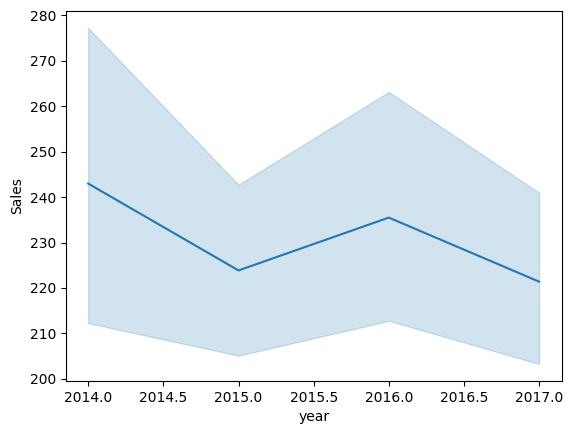

In [148]:
import seaborn as sns
sns.lineplot(x='year',y='Sales',data = df)
plt.show()